In [ ]:
import numpy as np
import matplotlib.pyplot as plt

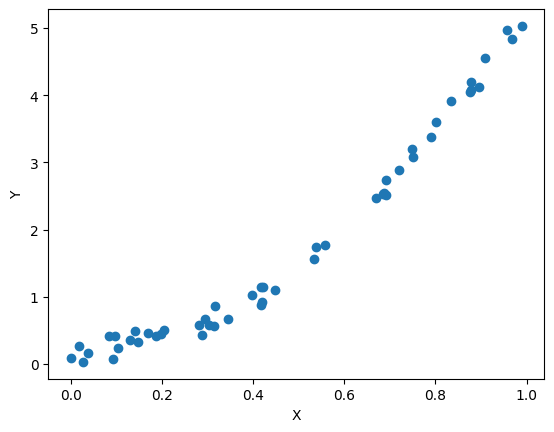

In [ ]:
np.random.seed(1)

X = np.random.rand(50,1)

y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect


plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
def adj_r2(model, X,Y):
    r2 = model.score(X, Y)

    res = (1 - ((1-r2)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
    return res

In [ ]:
print("Adj R2:", adj_r2(model, X,y) )

Adj R2: 0.9332371047707784


In [ ]:
output = model.predict(X)

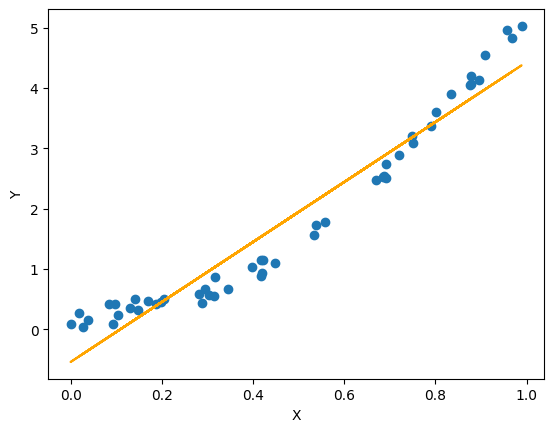

In [ ]:
plt.scatter(X, y)
plt.plot(X, output, c='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
X_deg2 = np.hstack([X, X**2])

model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)

LinearRegression()

In [ ]:
# predictions
output = model_deg2.predict(X_deg2)
output[:5]

array([[1.07454341],
       [2.83203697],
       [0.21120786],
       [0.657834  ],
       [0.30996295]])

In [ ]:
print("Adj R2:", adj_r2(model_deg2, X_deg2, y) )

Adj R2: 0.9946802186938059


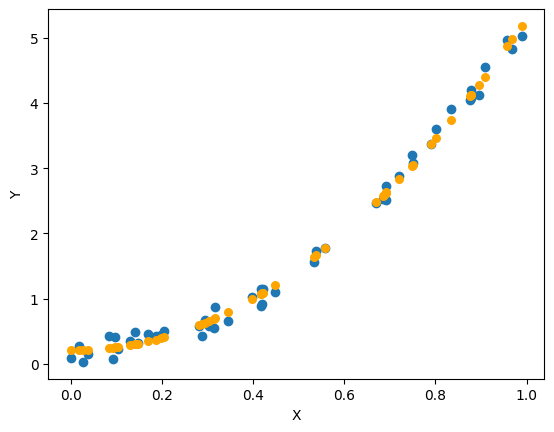

In [ ]:
plt.scatter(X, y)
plt.scatter(X, output, c='orange', s= 30)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
model_deg2.coef_

array([[-0.08592053,  5.17031932]])

In [ ]:
model_deg2.intercept_

array([0.21121762])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

Adj. R-square for Model Degree1: 0.9318166176382416


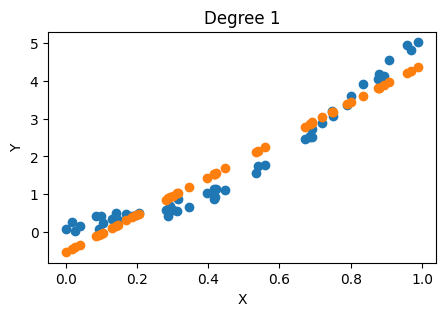

Adj. R-square for Model Degree2: 0.994564571274106


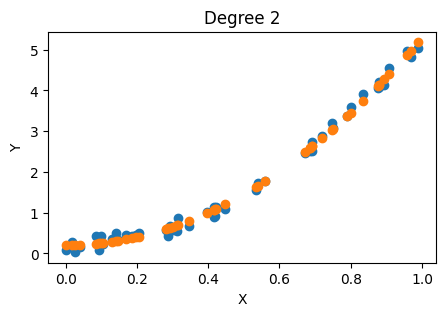

Adj. R-square for Model Degree3: 0.9944735532438161


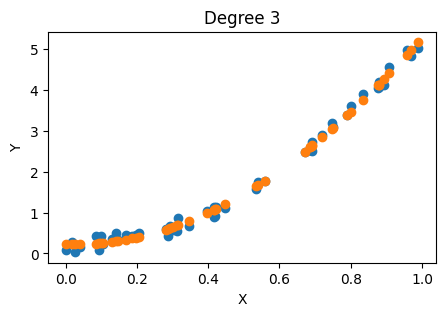

Adj. R-square for Model Degree4: 0.9954971261912255


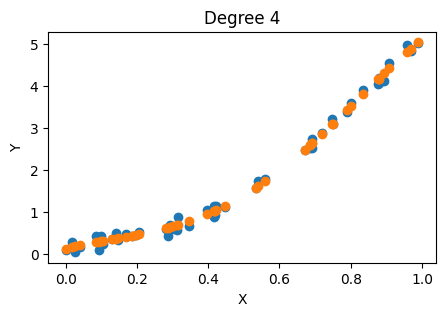

Adj. R-square for Model Degree5: 0.995442243943045


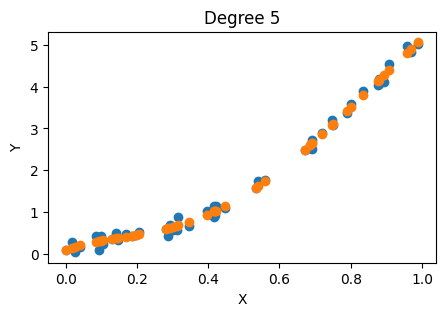

Adj. R-square for Model Degree6: 0.9953509779782863


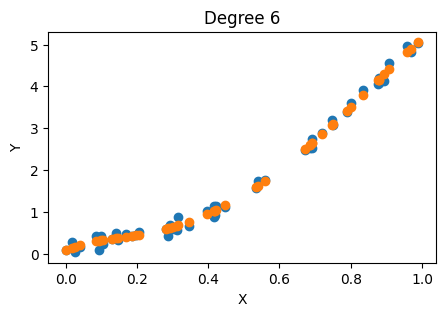

Adj. R-square for Model Degree7: 0.9952592325668053


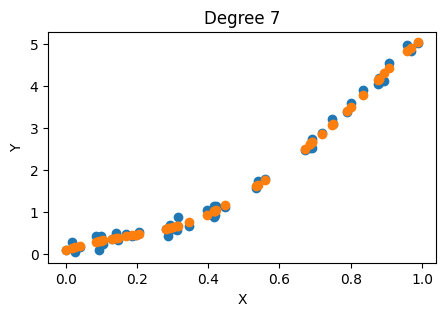

Adj. R-square for Model Degree8: 0.9951999334807831


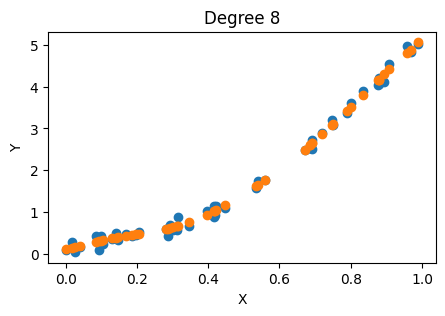

Adj. R-square for Model Degree9: 0.9951403796895061


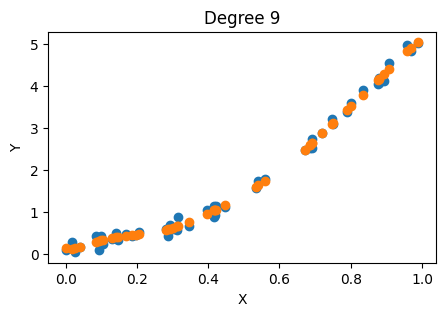

Adj. R-square for Model Degree10: 0.995212528048394


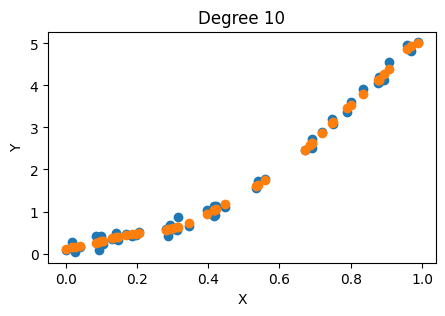

In [ ]:
scores = []

# Using Degrees 1 to 5, and seeing performance of the model
for i in range(1, 11):

    #creates polynomial feature
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)

    #Standardization
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting
    print(f'Adj. R-square for Model Degree{i}: {adj_r2(model,X_poly_scaled,y )}' )

    fig = plt.figure(figsize=(5,3))
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()

In [ ]:
# Occam's razor -> pick the simplest model that solves your problem
# m1 : x
# m2 : YES

# Underfit Overfit Code

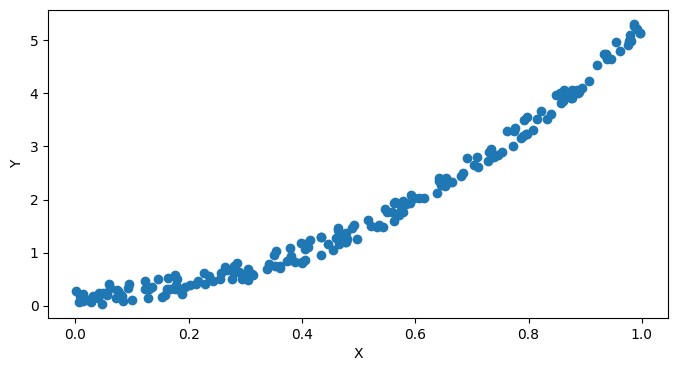

In [ ]:
X = np.random.rand(200,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(200,1)

plt.figure(figsize=(8,4))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
def adj_r(r_sq,X,Y):

    res = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1 +0.001) )

    return res

In [ ]:
degrees = 30

train_scores = []
test_scores = []

for d in range(1, degrees):

    #creates polynomial feature
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    #Standardization
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y_train)

    # Calculating performance
    adjr2_train = adj_r(model.score(X_poly_scaled,y_train) , X_poly_scaled, y_train)
    adjr2_test = adj_r(model.score(X_test_poly_scaled,y_test) , X_test_poly_scaled, y_test)


    train_scores.append(adjr2_train)
    test_scores.append(adjr2_test)


In [ ]:
train_scores[:5]

[0.9233144774436273,
 0.994489765104733,
 0.9945637587568815,
 0.9945615570115252,
 0.9945705666080569]

In [ ]:
test_scores[:5]

[0.9295800646294394,
 0.9947563193106018,
 0.9949633207159557,
 0.9945776345037824,
 0.9944365371511793]

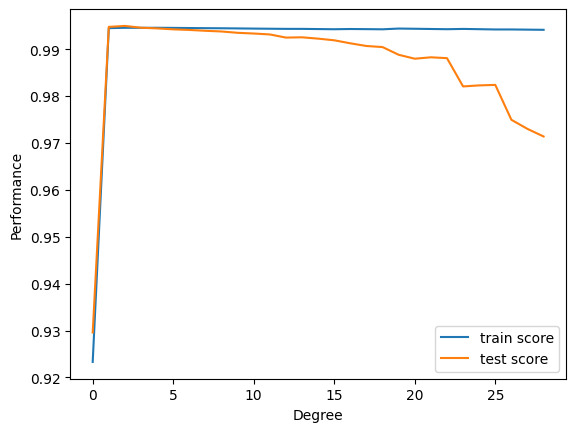

In [ ]:
plt.plot(train_scores, label="train score")
plt.plot(test_scores, label="test score")
plt.xlabel("Degree")
plt.ylabel("Performance")
plt.legend()
plt.show()

In [ ]:
np.argmax(test_scores)

2

In [ ]:
test_scores[:5]

[0.9295800646294394,
 0.9947563193106018,
 0.9949633207159557,
 0.9945776345037824,
 0.9944365371511793]